### Visualizing Data in Python
#### Tables, Histograms, Boxplots, and Slicing for Statistics

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

Today, we will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [1]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

# Load in the data set
tips_data = sns.load_dataset("tips")

#### Visualizing the Data - Tables
When you begin working with a new data set,  it is often best to print out the first few rows before you begin other analysis. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we are about to make. 

In [2]:
# Print out the first few rows of the data
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describing Data
Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [3]:
# Print out the summary statistics for the quantitative variables
tips_data.describe()
# this shows that we have 244 instances. max size of group is 6
# min size is 1 (so someone eating alone)
# we also see min and max sizes of tips
# we also see the average (mean) total_bill etc.
# subject of our data analysis:
# we will now be interested in seeing how variables like total_bill, size, day,
# smoker, time, sex might affect the tip. 

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creating a Histogram

After we have a general 'feel' for the data, it is often good to get a feel for the shape of the distribution of the data.

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


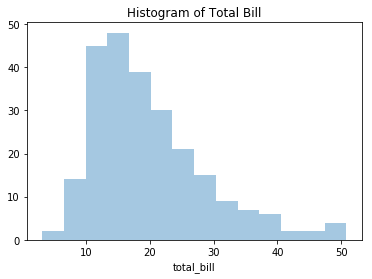

In [4]:
# Plot a histogram of the total bill
# always good to set a title for the plot
sns.distplot(tips_data["total_bill"], kde = False).set_title("Histogram of Total Bill")
plt.show()
# looks like a unimodal distribution with a right tail and has some outliers around 50

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


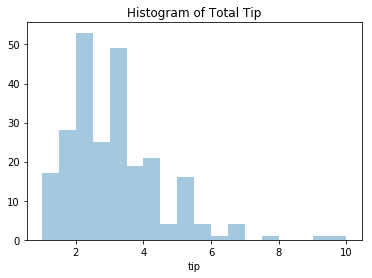

In [5]:
# Plot a histogram of the Tips only
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Total Tip")
plt.show()
# seems to be a unimodal distribution again with right tail and outliers on the right
# total_bill and tips distributions look roughly similar. 
# but lets plot them on the same plot to get a different perspective.

C:\ProgramData\Anaconda3\envs\tensorflow_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


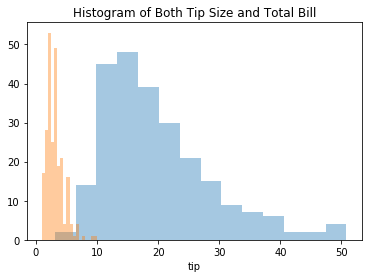

In [4]:
# Plot a histogram of both the total bill and the tips'
sns.distplot(tips_data["total_bill"], kde = False)
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Both Tip Size and Total Bill")
plt.show()
# ok, so now tips distribution is lot smaller than total_bill distribution
# but still the shape looks similar (both appear unimodal and right tailed with outliers on right)

#### Creating a Boxplot

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center (**median**) and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

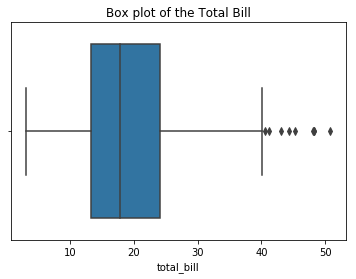

In [7]:
# Create a boxplot of the total bill amounts
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

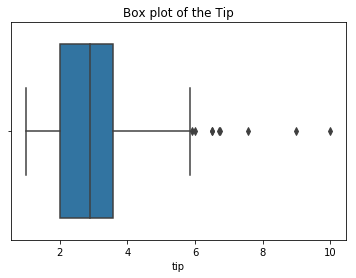

In [8]:
# Create a boxplot of the tips amounts
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Tip")
plt.show()

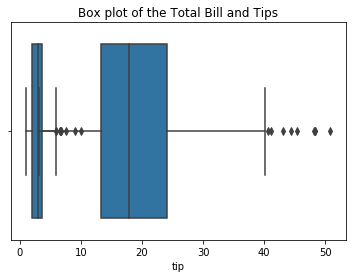

In [8]:
# Multiple boxplot: Create a boxplot of the tips and total bill amounts - do not do it like this
# if we want to plot multiple boxplots, see the next cell.
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Total Bill and Tips")
plt.show()

#### Creating Histograms and Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

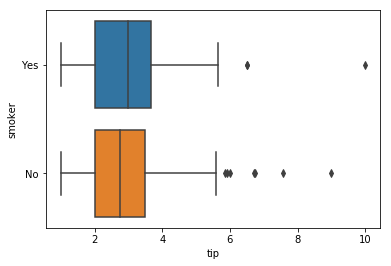

In [10]:
# Create a boxplot and histogram of the tips grouped by smoking status
# this is useful since it shows that spread, median and range of tip is very 
# similar for both smoker vs non-smoker groups
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])
plt.show()

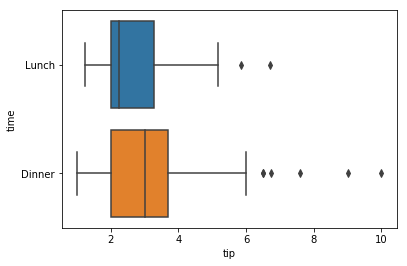

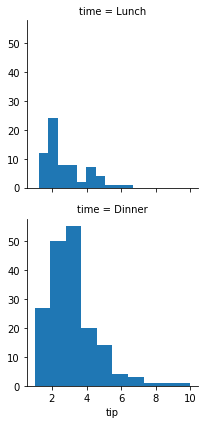

In [7]:
# Create a boxplot and histogram of the tips grouped by time of day
# this is useful since this shows that dinner has much better median tips
# as well as bigger range. so dinner in general provides better tips
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])
# lets also plot the tips into a histogram for both lunch and dinner 
g = sns.FacetGrid(tips_data, row = "time")
g = g.map(plt.hist, "tip")
plt.show()
# we see the tips histogram for dinner is much bigger than that for lunch
# hence the dinner generated much more tips.
# Though the patterns in both histograms are still unimodal and right-tailed

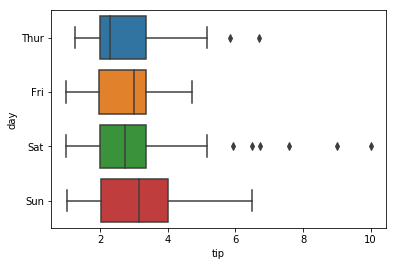

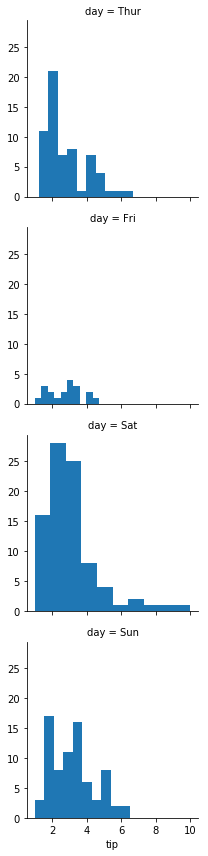

In [9]:
# Create a boxplot and histogram of the tips grouped by the day
# here we see that Sunday appears to be the best day for tips.
sns.boxplot(x = tips_data["tip"], y = tips_data["day"])
# plot histograms
g = sns.FacetGrid(tips_data, row = "day")
g = g.map(plt.hist, "tip")
plt.show()
# histogram for Friday is unusual so might need to follow up to check 
# histogram for Sat and Sunday show the opposite picture. Here Saturday 
# histogram is much bigger. So apparently Saturday is better day.
# The discrepancy is because on Saturday, there seem to be many more
# customers. Hance many more tips.
# But size of inividual tips seems to be higher on Sunday (higher median).
# This shows how histograms and boxplots together show
# different sides of the same story.